In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

In [27]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [28]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [29]:
train_set = dataset_train.iloc[:, 1:2].values

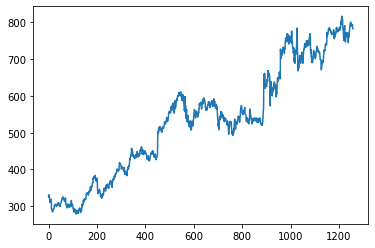

In [30]:
plt.plot(train_set)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
sc = MinMaxScaler()

In [33]:
train_set_scaled = sc.fit_transform(train_set)

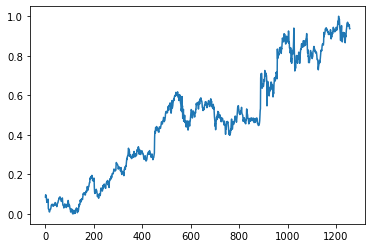

In [34]:
plt.plot(train_set_scaled)

In [35]:
train_set_scaled.shape

(1258, 1)

In [36]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])

In [37]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [38]:
X_train.shape

(1198, 60)

In [39]:
y_train.shape

(1198,)

In [40]:
X_train.shape[0]

1198

In [41]:
X_train.shape[1]

60

In [42]:
df =pd.DataFrame(X_train)

In [43]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [44]:
X_train.shape

(1198, 60, 1)

In [47]:
y = pd.DataFrame(y_train, columns = ['y'])

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838


In [48]:
y.head()

,y
0,0.086279
1,0.084716
2,0.074541
3,0.078838
4,0.072383


In [49]:
df_final = pd.concat([df,y], axis = 1)

Our DataFrame for Time Series will look like df_final 

In [50]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838,0.072383


In [52]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [54]:
reg = Sequential()

In [55]:
X_train.shape[1]

60

In [56]:
reg.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

In [57]:
reg.add(LSTM(50, return_sequences=True))
reg.add(Dropout(0.2))

In [58]:
reg.add(LSTM(50, return_sequences=True))
reg.add(Dropout(0.2))

In [59]:
reg.add(LSTM(50))
reg.add(Dropout(0.2))

In [60]:
reg.add(Dense(1))

In [61]:
reg.compile(optimizer='adam', loss = 'mean_squared_error')

In [62]:
reg.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000249CF2D92E0>>

In [63]:
reg.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 111ms/step - loss: 0.0352
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0040
Epoch 13/100

38/38 [==============================] - 6s 152ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0014


In [64]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv') 

In [65]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [67]:
dataset_test.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [69]:
dataset_test.shape

(20, 6)

In [70]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [71]:
real_stock_price.shape

(20, 1)

In [74]:
dataset_total = pd.concat([dataset_train['Open'], dataset_test['Open']], axis =0)

In [75]:
len(dataset_total)

1278

In [76]:
len(dataset_test)

20

In [77]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [78]:
inputs.shape

(80,)

In [79]:
inputs = inputs.reshape(-1,1)

In [80]:
inputs.shape

(80, 1)

In [81]:
inputs = sc.transform(inputs)

In [82]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = reg.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [83]:
predicted_stock_price

array([[785.1537 ],
       [782.2771 ],
       [782.31586],
       [783.6718 ],
       [787.1281 ],
       [793.2599 ],
       [799.0269 ],
       [801.5373 ],
       [801.86005],
       [801.2994 ],
       [800.62683],
       [800.0145 ],
       [799.6373 ],
       [800.12317],
       [801.18304],
       [805.959  ],
       [813.22687],
       [821.12067],
       [825.56995],
       [821.5141 ]], dtype=float32)

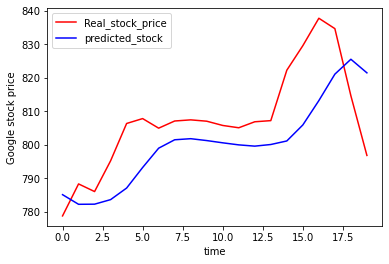

In [84]:
plt.plot(real_stock_price, color = "red", label = "Real_stock_price")
plt.plot(predicted_stock_price, color = "blue", label = "predicted_stock")
plt.xlabel("time")
plt.ylabel('Google stock price')
plt.legend()
plt.show()

AARima

In [97]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv', parse_dates = ['Date'], index_col = ['Date'])
df_test = pd.read_csv('Google_Stock_Price_Test.csv', parse_dates = ['Date'], index_col = ['Date'])

In [98]:
df_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


Step 2:- Resample

In [100]:
df_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [103]:
train_set = df_train.iloc[:,0:1]

In [104]:
train_set.head()

,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04


In [107]:
test_set = df_test.iloc[:,0:1]

In [108]:
test_set.head()

,Open
Date,
2017-01-03,778.81
2017-01-04,788.36
2017-01-05,786.08
2017-01-06,795.26
2017-01-09,806.40


In [109]:
ts = train_set['Open'].resample('MS').sum()

In [110]:
ts.head()

Date
2012-01-01    6147.08
2012-02-01    6027.06
2012-03-01    6866.30
2012-04-01    6189.97
2012-05-01    6641.43
Freq: MS, Name: Open, dtype: float64

<AxesSubplot:xlabel='Date'>

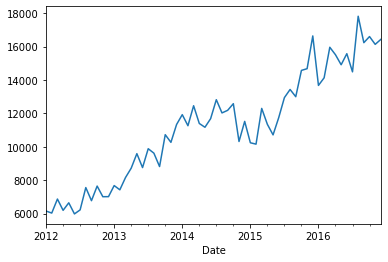

In [111]:
ts.plot()

Stationarity Check

In [114]:
import statsmodels.api as sm

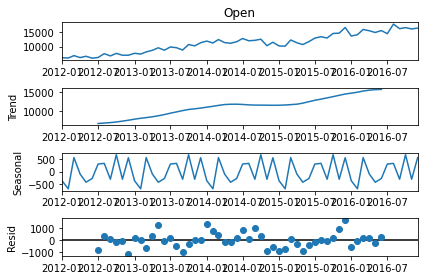

In [120]:
decomposition = sm.tsa.seasonal_decompose(ts, model = 'additive')
fig =decomposition.plot()
plt.show()

In [121]:
from statsmodels.tsa.stattools import adfuller

In [122]:
adtest = adfuller(ts)

In [124]:
print(adtest[1])

0.7709993302141817


In [125]:
len(ts)

60

In [128]:
train = ts[:55]
test = ts[55:]

Hyperparameter for ARIMA p, d, q

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
import itertools

In [133]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [134]:
pdq_combintion = list(itertools.product(p,d,q))

In [135]:
len(pdq_combintion)

128

In [151]:
#pdq_combintion

In [136]:
rmse = []
order1 = []

In [137]:
from statsmodels.tsa.arima_model import ARIMA

In [141]:
from sklearn.metrics import mean_squared_error

In [182]:
for pdq in pdq_combintion:
    try:
        pred1 = []
        model = sm.tsa.arima.ARIMA(train, order = pdq).fit()
        pred = model.predict(start = len(train), end = len((ts) - 1))
        pred.values
        for i in range(0,5):
            pred1.append(pred[i])
            
        error = np.sqrt(mean_squared_error(test, pred1))

        order1.append(pdq)
        rmse.append(error)
    
    except:
        continue

In [186]:
#result = pd.DataFrame(index = order1, data = rmse, columns = ['RMSE'])

In [190]:
rmse[108]

1383.7744175520788

In [189]:
rmse.index(min(rmse))

108

In [191]:
order1[108]

(6, 1, 4)

In [165]:
print(len(train))
print(len(test))

55
5


In [192]:
model = sm.tsa.arima.ARIMA(train, order= (6, 1, 4)).fit()

In [193]:
pred = model.predict(start = len(train), end = len((ts) - 1))

<AxesSubplot:xlabel='Date'>

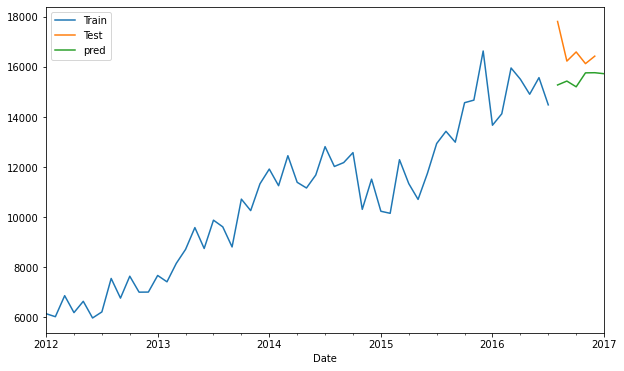

In [194]:
train.plot(legend = True, label = 'Train', figsize = (10,6))
test.plot(legend = True, label = 'Test')
pred.plot(legend = True, label = 'pred')

In [195]:
pred.values

array([15277.64887474, 15433.69505915, 15204.27483091, 15761.23364029,
       15767.27617953, 15727.60163374])

In [196]:
test

Date
2016-08-01    17813.10
2016-09-01    16230.79
2016-10-01    16596.18
2016-11-01    16129.44
2016-12-01    16428.57
Freq: MS, Name: Open, dtype: float64